In [7]:
from Simulation import *
from Geometry import *
from mie_data import mie_10nm
from mie_data import mie_40nm

# Mie Theory Verification

In [8]:
wavelength_list = np.linspace(400,700,101)

## 10 nm radius 

In [9]:
%%time
mesh = Nanosphere(10,0,300,600)
sim10nm = Simulation(mesh)
sim10nm.RefineMesh()

DoF:  73155
Max Error:  0.006224884286650607
DoF:  123744
Max Error:  0.0022660326887399542
DoF:  210584
Max Error:  0.001485616625080747
DoF:  230308
Max Error:  0.000683834517469389
Wall time: 4min 5s


In [5]:
%%time
ext_list10nm = np.array([(wavelength,sim10nm.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  433.3333333333333
Wavelength:  466.6666666666667
Wavelength:  500.0
Wavelength:  533.3333333333334
Wavelength:  566.6666666666667
Wavelength:  600.0
Wavelength:  633.3333333333334
Wavelength:  666.6666666666667
Wavelength:  700.0
Wall time: 4min 36s


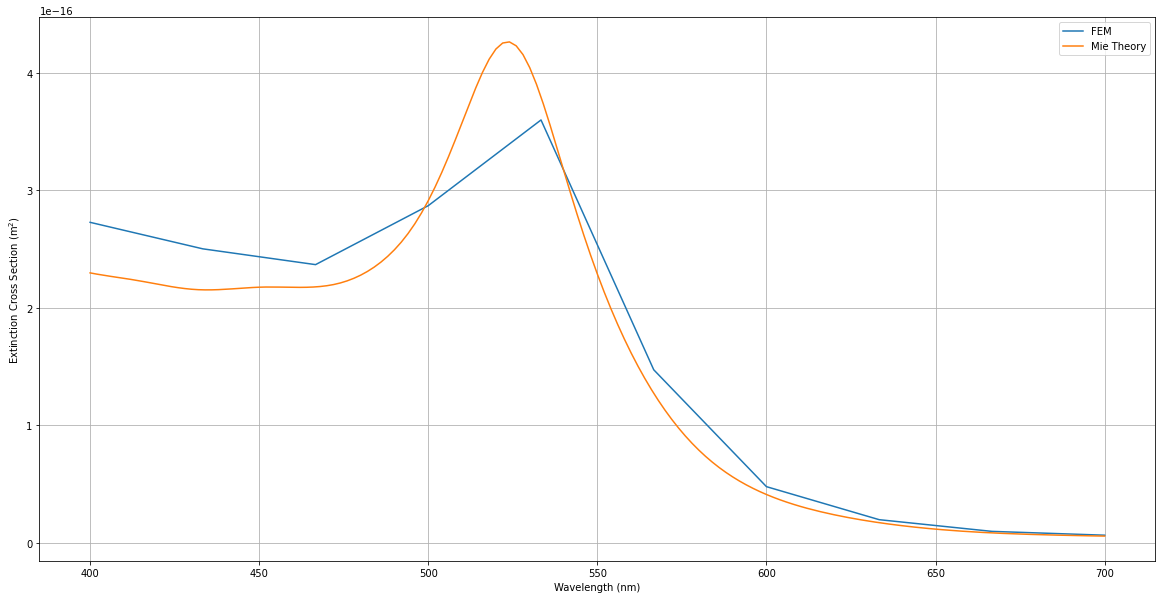

In [6]:
plt.figure(figsize=(20,10))
plt.plot(ext_list10nm[:,0],-ext_list10nm[:,1],label="FEM")
plt.plot(mie_10nm[:,0]*1e+9,mie_10nm[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

## 40 nm radius

In [6]:
%%time
mesh = Nanosphere(40,0,300,60)
sim40nm = Simulation(mesh)
sim40nm.RefineMesh()

DoF:  28260
Max Error:  0.20321206448799334
DoF:  61509
Max Error:  0.03765519624330862
DoF:  229843
Max Error:  0.016609442669957154
DoF:  273205
Max Error:  0.008194500302969306
DoF:  578128
Max Error:  0.004104533509381207


KeyboardInterrupt: 

In [ ]:
%%time
ext_list40nm = np.array([(wavelength,sim40nm.Extinction(wavelength)) for wavelength in wavelength_list])

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ext_list40nm[:,0],-ext_list40nm[:,1],label="FEM")
plt.plot(mie_40nm[:,0]*1e+9,mie_40nm[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

# Model Verification

## 10nm Microtubules

In [ ]:
%%time
mesh_radial = Nanosphere(40, 10, 300, 600, mt_model="radial")
sim_radial = Simulation(mesh_radial)
sim_radial.RefineMesh(4,7)

In [ ]:
%%time
mesh_cylinder = Nanosphere(40, 10, 300, 600, mt_model="cylinder")
sim_cylinder = Simulation(mesh_cylinder)
sim_cylinder.RefineMesh(4,7)

In [ ]:
%%time
ext_list_radial = np.array([sim_radial.Extinction(wavelength) for wavelength in wavelength_list])

In [ ]:
%%time 
ext_list_cylinder = np.array([sim_cylinder.Extinction(wavelength) for wavelength in wavelength_list])

In [ ]:
plt.figure()
plt.plot(ext_list_radial[:,0],ext_list_radial[:,1],label="Radial Model")
plt.plot(ext_list_cylinder[:,0],ext_list_cylinder[:,1],label="Cylinder Model")
plt.grid()
plt.legend()
plt.show()
